In [1]:
import numpy
import importlib
%config InlineBackend.figure_format = "retina"

import TransferMatrixMethod as tmm
import RefractiveIndexDB as ridb
import PlotTools as plt

In [2]:
simul_0 = tmm.TMMOptics()
simul_0, simul_0.__dict__

(<TMMOOPapproach.TMMOptics at 0x10411f310>, {})

In [8]:
simul_0.beam_parameters(range(200, 5001), angle_incidence=range(91), wavelength_0=700)
simul_0.__dict__.keys()

dict_keys(['wavelength', 'angle_inc_deg', 'angle_inc_rad', 'polarisation', 'wavelength_0', 'wavelength_0_idx', 'n_wavelength_0', 'physical_thickness', 'ref_coeff_p', 'ref_coeff_s', 'tra_coeff_p', 'tra_coeff_s', 'transmittance_p', 'transmittance_s', 'reflectance_p', 'reflectance_s', 'reflectance', 'transmittance', 'admittance_p', 'admittance_s', 'phase'])

In [9]:
l1 = tmm.LayerTMMO(ridb.air(simul_0.wavelength))
l2 = tmm.LayerTMMO(1.45*numpy.ones(len(simul_0.wavelength)), thickness=1/4, layer_type="OT")
l3 = tmm.LayerTMMO(3.45*numpy.ones(len(simul_0.wavelength)), thickness=1/4, layer_type="OT")
layers = [l1, l2, l3, l2, l3, l2, l3, l2, l3, l1]

In [10]:
simul_0.tmm_spectra(layers)

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='Wavelength [nm]', ylabel='Angle of incidence [degree]'>,
 <matplotlib.collections.QuadMesh at 0x123e2b4c0>)

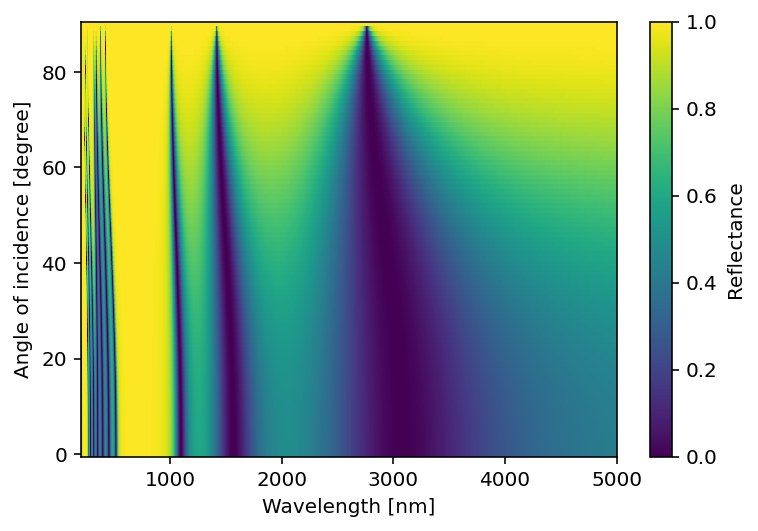

In [18]:
plt.plot_spectrum_2d(simul_0.wavelength, simul_0.angle_inc_deg, simul_0.reflectance_s.T)

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='Wavelength [nm]', ylabel='Angle of incidence [degree]'>,
 <matplotlib.collections.QuadMesh at 0x123e3d340>)

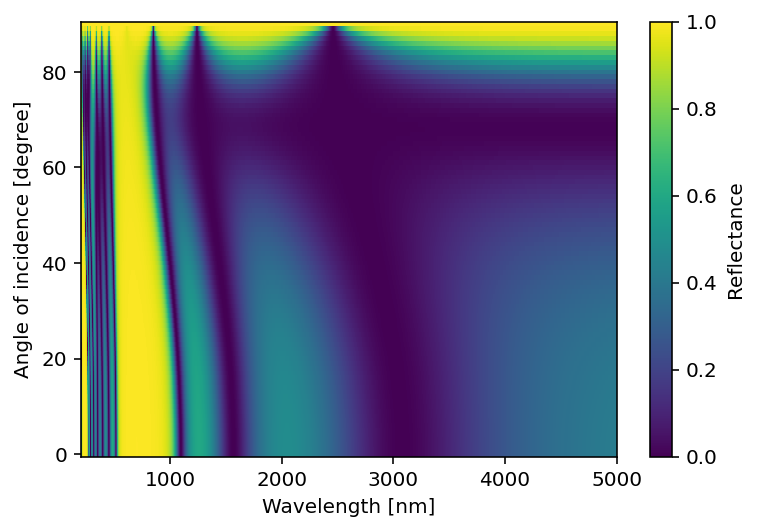

In [19]:
plt.plot_spectrum_2d(simul_0.wavelength, simul_0.angle_inc_deg, simul_0.reflectance_p.T)

In [12]:
simul_0.tmm_emf(layers)

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='Wavelength [nm]', ylabel='Depth [nm]'>,
 <matplotlib.collections.QuadMesh at 0x123c24790>)

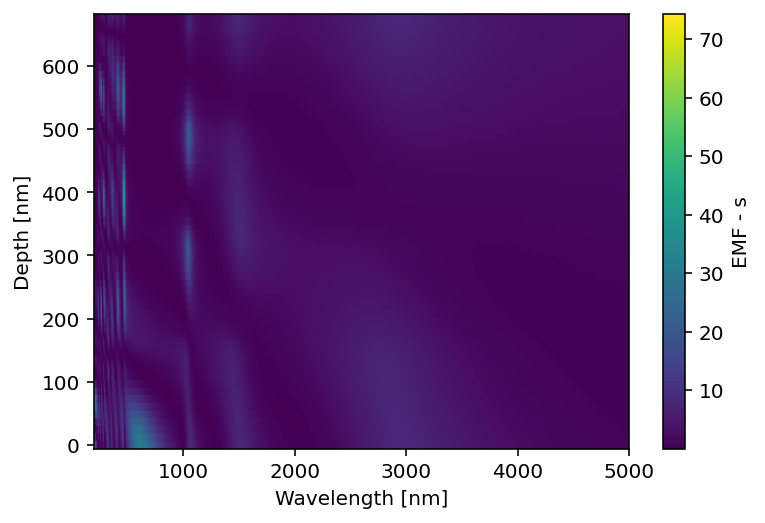

In [20]:
plt.plot_spectrum_2d(simul_0.wavelength, simul_0.layers_depth, (simul_0.EMFs[:, 44, :].T), title_label="EMF - s", ylabel="Depth [nm]")

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='Wavelength [nm]', ylabel='Depth [nm]'>,
 <matplotlib.collections.QuadMesh at 0x123ed1190>)

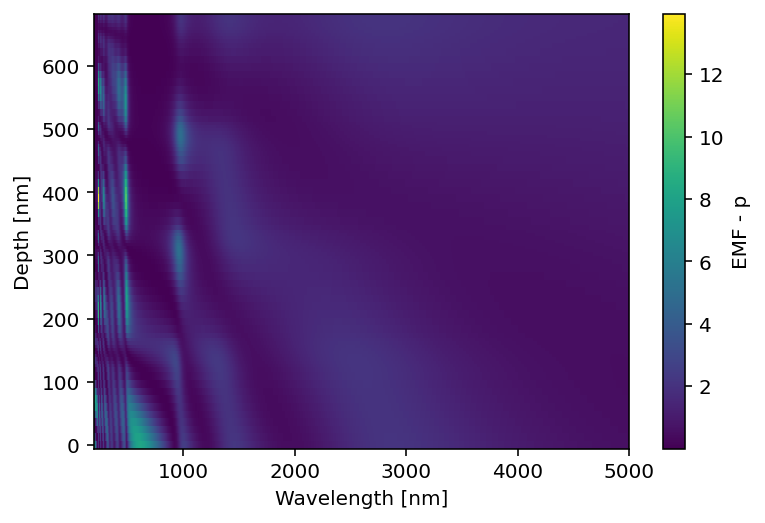

In [21]:
plt.plot_spectrum_2d(simul_0.wavelength, simul_0.layers_depth, (simul_0.EMFp[:, 44, :].T), title_label="EMF - p", ylabel="Depth [nm]")

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Thickness profile [nm]', ylabel='Refractive index at lambda_0'>)

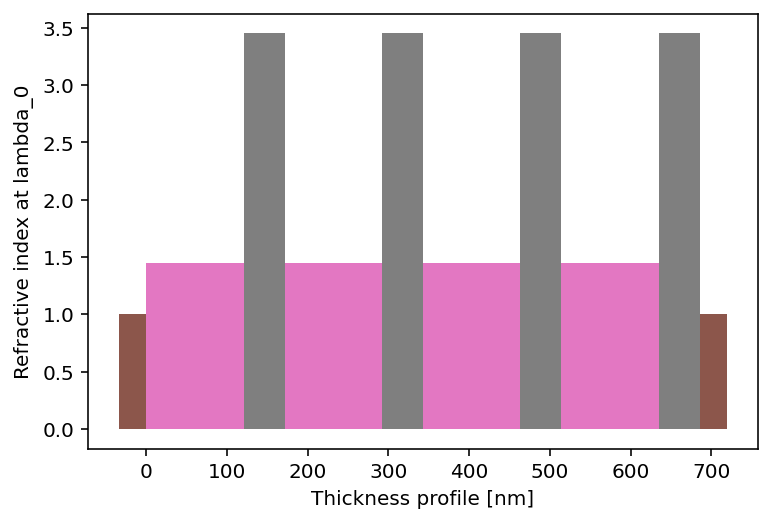

In [22]:
plt.plot_index_profile(simul_0)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Thickness profile [nm]', ylabel='Refractive index at lambda_0'>)

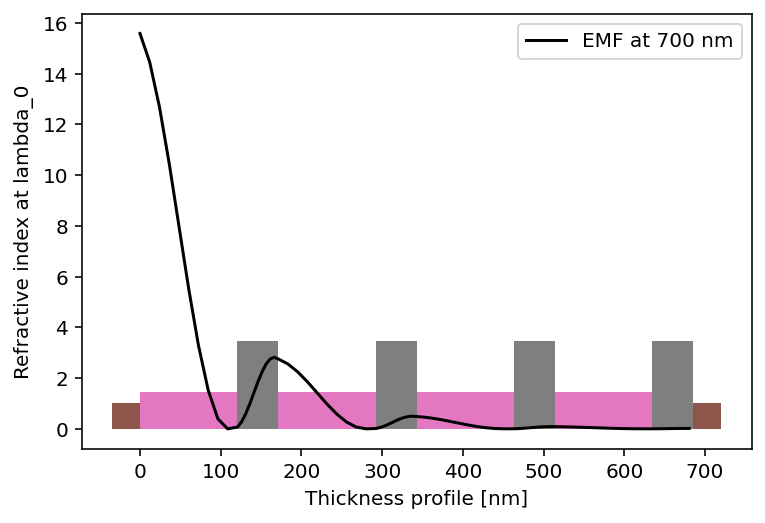

In [23]:
plt.plot_index_profile(simul_0, plotemf=True, angle=0, wavelength=700)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Thickness profile [nm]', ylabel='Refractive index at lambda_0'>)

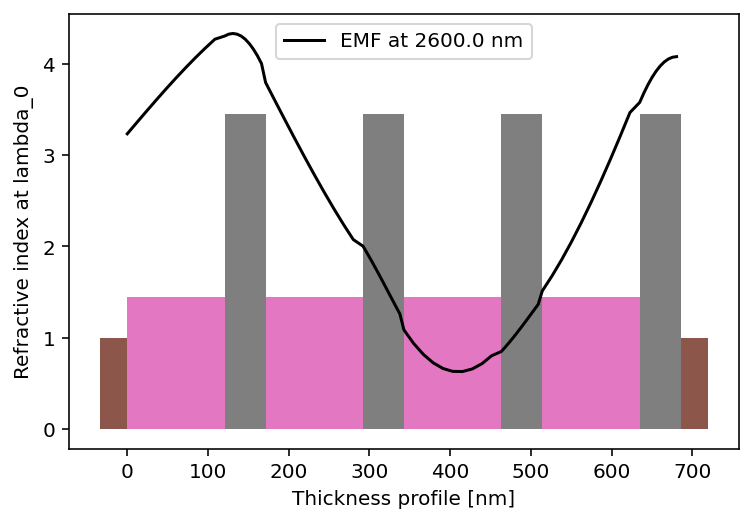

In [24]:
plt.plot_index_profile(simul_0, plotemf=True)

In [25]:
simul_0.photonic_dispersion(layers)

/Users/kwazii/Leandro/code_dev__/python/ajuste_capas_simples/TMMOOPapproach.py:377: RuntimeWarning: invalid value encountered in arccos
  self.bloch_vector_p[b, a] = numpy.arccos(_bloch_wavevector(a1, a2, factor_p[a]))
/Users/kwazii/Leandro/code_dev__/python/ajuste_capas_simples/TMMOOPapproach.py:378: RuntimeWarning: invalid value encountered in arccos
  self.bloch_vector_s[b, a] = numpy.arccos(_bloch_wavevector(a1, a2, factor_s[a]))


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Parallel wavevector, qz (2*pi/Lambda)', ylabel='omega*Lambda/(2*pi)'>,
 <matplotlib.collections.QuadMesh at 0x2ca9a0d00>)

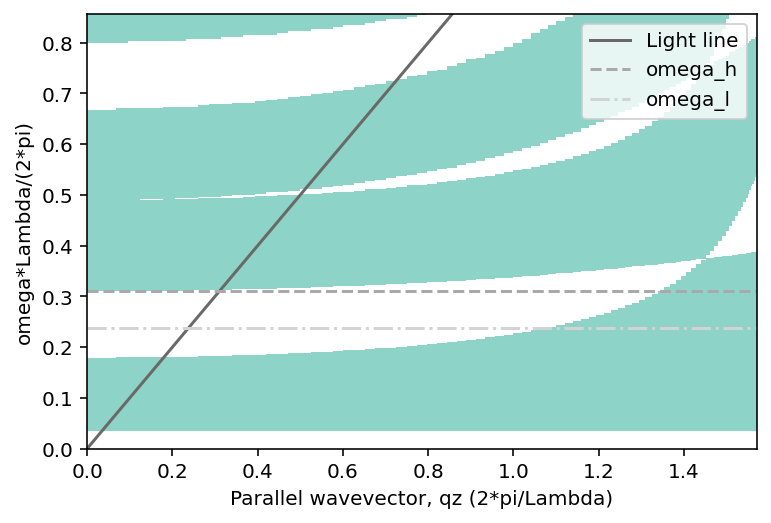

In [40]:
plt.pbg_dispersion_2d(simul_0)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Parallel wavevector, qz (2*pi/Lambda)', ylabel='omega*Lambda/(2*pi)'>,
 <matplotlib.collections.QuadMesh at 0x2dfe295b0>)

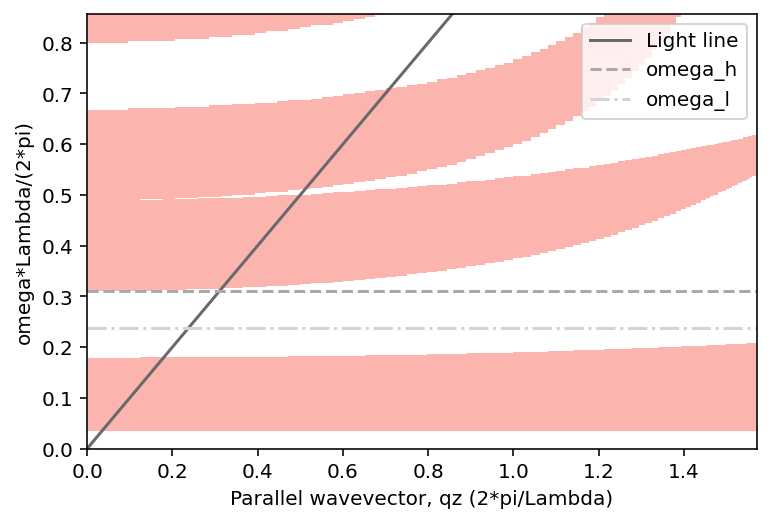

In [41]:
plt.pbg_dispersion_2d(simul_0, wave="s")

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'p-wave          s-wave'}, xlabel='Parallel wavevector, qz (2*pi/Lambda)', ylabel='omega*Lambda/(2*pi)'>,
 <matplotlib.collections.QuadMesh at 0x35a663250>)

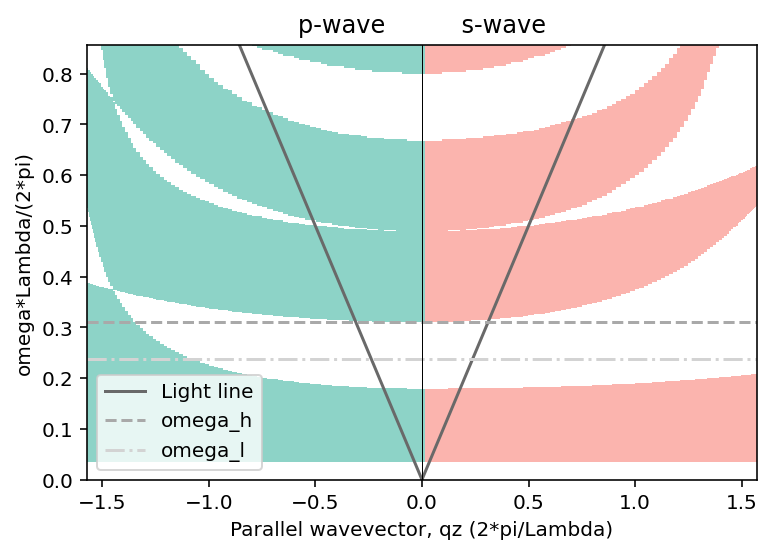

In [49]:
plt.pbg_dispersion_2d_alt(simul_0)